In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os
import json
import requests
import openai
from base64 import b64decode
from io import BytesIO
from PIL import Image

<IPython.core.display.Javascript object>

In [3]:
openai.api_key = os.environ.get("OPENAI_API_KEY")

<IPython.core.display.Javascript object>

#### Parameters

- The image to edit - PNG format with less than 4MB, and square.

- A mask specifying the portion to be regenerated - fully transparent areas are edited/updates


- prompt describing the desired change - max 1000 chars


- n - 1 to 10


- size - 256x256, 512x512, or 1024x1024


- response_format - url or b64_json

In [4]:
size = "512x512"

<IPython.core.display.Javascript object>

In [22]:
# create a mask
width = 512
height = 512
mask = Image.new("RGBA", (width, height), (0, 0, 0, 1))  # create an opaque image mask

# set the bottom half to be transparent
for x in range(width):
    for y in range(height // 2, height):  # only loop over the bottom half of the mask
        # set alpha (A) to zero to turn pixel transparent
        alpha = 0
        mask.putpixel((x, y), (0, 0, 0, alpha))
mask.save("images/mask.png")

<IPython.core.display.Javascript object>

In [21]:
# display(Image.open("images/mask.png"))

<IPython.core.display.Javascript object>

In [7]:
ref_img_path = "images/image_url_0.png"
mask_img_path = "images/mask.png"

response = openai.Image.create_edit(
    image=open(ref_img_path, "rb"),
    mask=open(mask_img_path, "rb"),
    prompt="A cyberpunk monkey hacker dreaming of a beautiful bunch of bananas, digital art",
    n=2,
    size=size,
    response_format="b64_json",
)
print(response)

{
  "created": 1679024598,
  "data": [
    {
      "b64_json": "iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAAAaGVYSWZNTQAqAAAACAACknwAAgAAACkAAAAmkoYAAgAAABgAAABQAAAAAE9wZW5BSS0tY2QyNjg4ODJiN2IzMGI3MTc1NmI1MWMwNDgyNDJmN2IAAE1hZGUgd2l0aCBPcGVuQUkgREFMTC1FAHynH70AAQAASURBVHgBABaE6XsB/f2NAQH/AAEBAAD+AP/6AAH9AAD9AAD6AfPs9+foCBEXAREb/QMHAQH8Av76AP7+/wID///8Af8AAQAA/wD+///8Af79Afz9AAD///8AAf8DAPH9+eXz/wALCCAkABAO/AcBBP3cAP74AAD5///6//78//v4A/wK07zpwbrtBAQh+/37+//1+v4B/vz/GgwEKhkKCw7sK0csABQD/QD6APn+Avb+APsA//wEAf4AAQACAP8AAP7///8AAP4AAP79Af0AAP8BAP7/AP7/AP4A//0AAAD/AAAAAP7/Aff+APv7APsB/v39AP7/Af4B/wEAAAECAQD8AAAAAP8A//3/AP4B//8A///+//8C///+AP8C///+AQAA/gD//AID+f0B7/T3A/8CEg0GBgMABP/++Pn9+Pr+//z+/P8A8P0Hu93k2Pf/+QgKAQAACAAABgACAgIDBwEDBAABCQICCQQCCQP/EQUEFggCDgYDBwIDBAME/wEC/gH8AAED+v3/+fj7/PwB/AEB6fn76Pn9/AMEBQD9Cfz6C/77Cf76AgAC9AEG4vX66Pn75e7v+P389/79/f8BAAMCBQEAAwEB/gMDAP79FQP9NRkVGggG/fz+/AAE/v8BAQD+AAAA/gEC//7+AAH//wAC////Af8B/v79/wEB/gEA/v79AAED///+////AQAB//8A/QEB/gD/AAEBAQD//wED/v4A

<IPython.core.display.Javascript object>

In [8]:
for index, image_dict in enumerate(response["data"]):
    img = b64decode(image_dict["b64_json"])
    image_file = "images/image_edit_" + str(index) + ".png"
    with open(image_file, mode="wb") as img_file:
        img_file.write(img)

<IPython.core.display.Javascript object>

In [11]:
#!ls -la images/

<IPython.core.display.Javascript object>

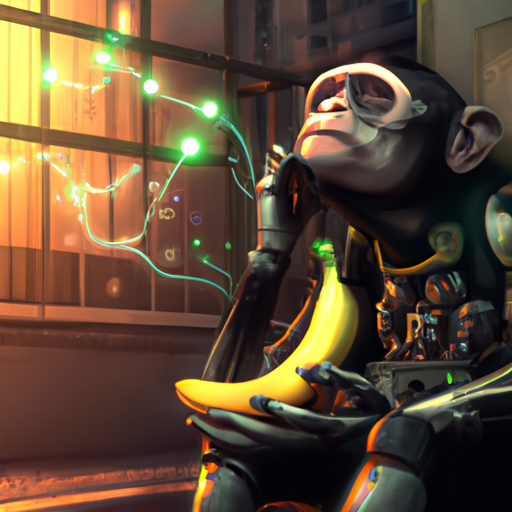

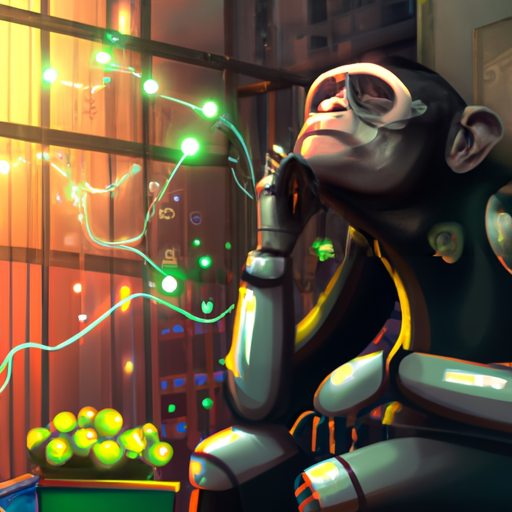

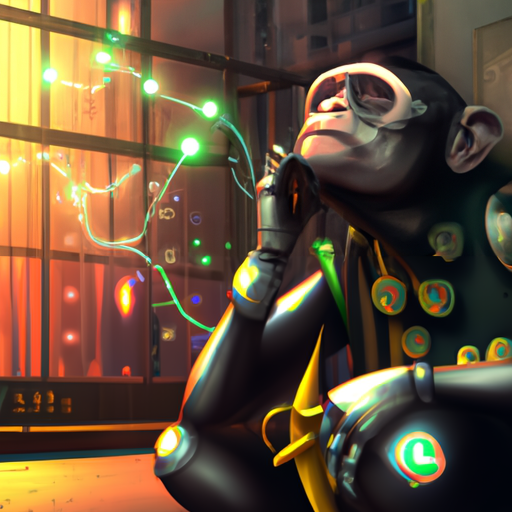

<IPython.core.display.Javascript object>

In [10]:
display(Image.open("images/image_url_0.png"))
display(Image.open("images/image_edit_0.png"))
display(Image.open("images/image_edit_1.png"))